In [1]:
from gradients import *

In [2]:
SUBJECTS = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
17, 18, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 33,
35, 36, 38, 39, 40, 42, 43, 44, 45, 46, ]

EPICS = ['baseline', 'early', 'late']
# rest and learning are removed in make_gradients

In [4]:
data_sample = load_data(subj=1, epic='rest')
data_sample

,7Networks_LH_Vis_1,7Networks_LH_Vis_2,7Networks_LH_Vis_3,7Networks_LH_Vis_4,7Networks_LH_Vis_5,7Networks_LH_Vis_6,7Networks_LH_Vis_7,7Networks_LH_Vis_8,7Networks_LH_Vis_9,7Networks_LH_Vis_10,...,7Networks_RH_Default_pCunPCC_11,7Networks_RH_Default_pCunPCC_12,7Networks_RH_Default_pCunPCC_13,7Networks_RH_Default_pCunPCC_14,7Networks_RH_Default_pCunPCC_15,7Networks_RH_Default_pCunPCC_16,7Networks_RH_Default_pCunPCC_17,7Networks_RH_Default_pCunPCC_18,7Networks_RH_Cont_pCun_2,7Networks_RH_Cont_pCun_4
81,-1.147130,-0.011634,-0.834681,-0.981172,-1.318338,-0.709555,-0.171125,-0.250766,-0.217906,-0.344197,...,0.223958,0.232471,0.116335,-1.442267,0.817496,0.767920,-0.306158,0.638966,-0.426738,-0.397361
82,-1.320467,-0.231867,-0.563454,-1.171296,-0.817096,-0.323944,-0.904119,-0.269817,-0.090908,0.115817,...,-0.180995,-0.166467,-0.156110,-1.461224,0.465259,0.476541,-1.133818,0.368850,-1.214839,-0.509315
83,-1.174421,-0.428674,-0.363888,-0.905439,-0.494907,0.285463,-0.690789,-0.348310,0.206873,0.752206,...,0.192179,0.205476,-0.279778,-0.404232,0.050101,0.065233,-1.409807,0.031880,-1.246409,-0.476142
84,-0.756209,-0.760254,-0.420412,-0.667015,-0.666464,0.762095,0.164170,-0.601564,0.435701,1.124047,...,0.506466,0.538640,-0.609860,0.768665,-0.484686,-0.588126,-1.526292,-0.377665,-0.714696,-0.328736
85,-0.434393,-1.194737,-0.765582,-0.713403,-1.228695,0.819357,0.686869,-1.041278,0.278734,0.842465,...,0.129248,0.412432,-1.048262,1.386302,-0.927485,-1.306482,-1.644069,-0.645880,-0.149643,-0.187327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,1.445563,1.121662,0.346299,0.184897,0.825249,0.372480,0.884837,0.344942,0.317202,1.401255,...,-0.192042,-0.877654,0.218058,1.913745,-0.300930,-0.729227,0.655901,0.581592,0.211765,0.690607
293,0.931139,1.339557,0.294348,0.275699,1.059023,1.462570,1.737677,0.704522,1.422811,1.281799,...,-0.011276,0.301594,0.108651,1.667814,-0.470783,-0.396696,0.353038,0.156804,0.365213,0.464623
294,0.146482,1.281695,0.341882,0.241623,0.899874,1.757626,1.471905,0.917270,2.029235,0.879437,...,0.224614,1.517956,-0.033524,0.921649,-0.453863,0.518422,0.302741,-0.234622,0.529878,0.214169
295,-0.096195,0.645910,0.398379,-0.180930,0.630592,0.834628,0.299376,0.876233,1.190080,0.603152,...,-0.093380,1.236797,-0.234652,0.025174,-0.389619,0.717657,0.247995,-0.637489,0.106300,-0.361705


In [5]:
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting


def plot_conn_mat(subject: int, epic: str):
    time_series = load_data(subj=subject, epic=epic)
    labels = time_series.columns.tolist()
    time_series = time_series.to_numpy()
    correlation_measure = ConnectivityMeasure(kind='correlation')
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    np.fill_diagonal(correlation_matrix, 0)
    plotting.plot_matrix(correlation_matrix, labels=labels, colorbar=True, figure=(10, 15),
                     vmax=0.8, vmin=-0.8)

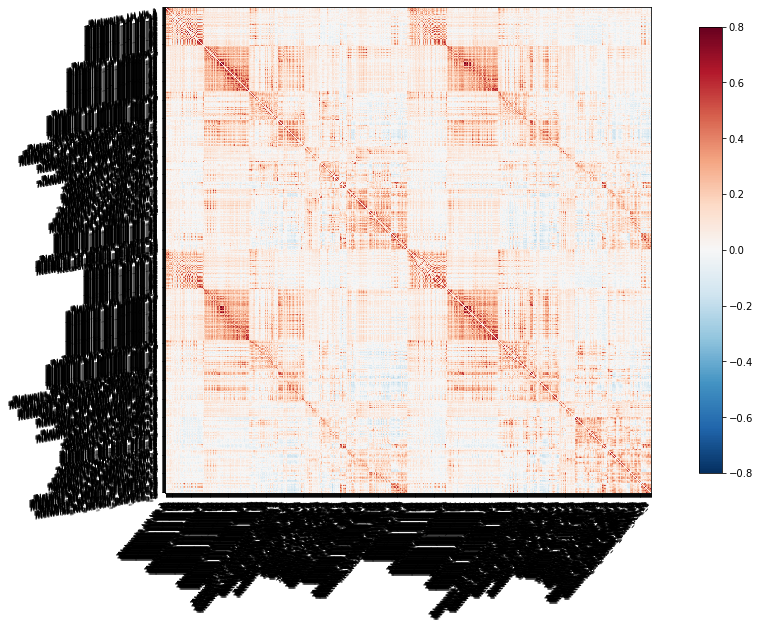

In [8]:
def plot_conn(epic: str):
    m = np.zeros((998, 998))
    for s in SUBJECTS:
        time_series = load_data(subj=s, epic=epic)
        labels = time_series.columns.tolist()
        time_series = time_series.to_numpy()
        correlation_measure = ConnectivityMeasure(kind='correlation')
        correlation_matrix = correlation_measure.fit_transform([time_series])[0]
        m += correlation_matrix
    m /= len(SUBJECTS)
    np.fill_diagonal(m, 0)
    plotting.plot_matrix(m, labels=labels, colorbar=True, figure=(10, 15),
                     vmax=0.8, vmin=-0.8)

plot_conn('rest')

In [6]:
#todo threshold on connectivity matrix

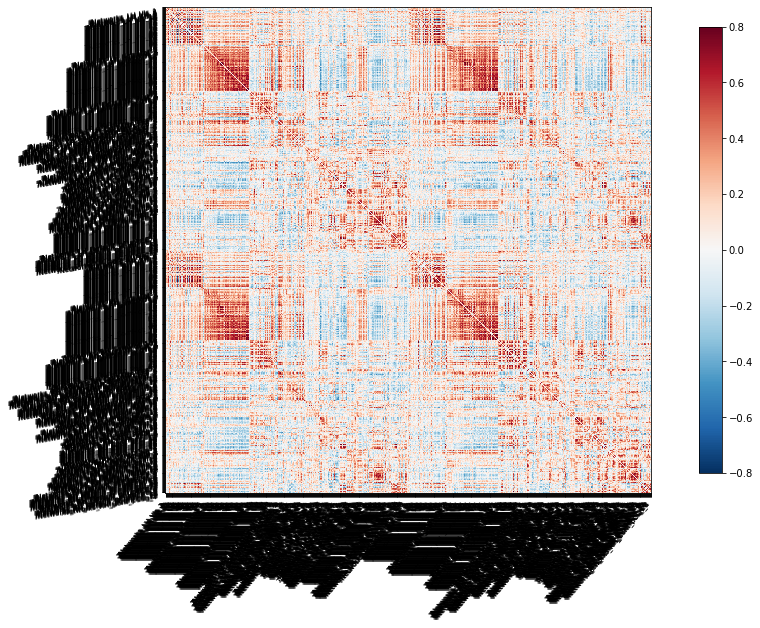

In [7]:
plot_conn_mat(2, 'rest')

In [49]:
import seaborn as sns

<AxesSubplot:ylabel='Count'>

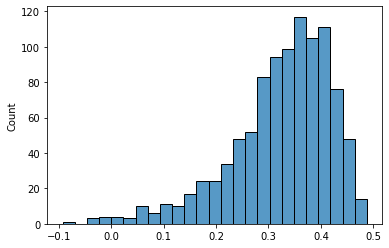

In [47]:
sns.histplot(correlation_matrix.mean(axis=1))

<AxesSubplot:ylabel='Count'>

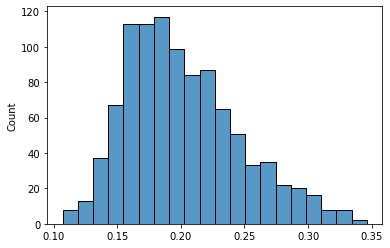

In [48]:
sns.histplot(correlation_matrix.std(axis=1))